In [17]:
from split_data import split
import numpy as np
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid


In [55]:
device = torch.device("mps")
source_path = "../Data/Original/Apple"
training_path = "../train_data/"
testing_path = "../test_data/"
train_test_ratio = 0.7
split(source_path, training_path, testing_path, train_test_ratio) 

Finish splitting Apple_scab
[Training Samples:441, Testing Samples:189]   Original Samples:630
---------------------
Finish splitting Healthy
[Training Samples:1151, Testing Samples:494]   Original Samples:1645
---------------------
Finish splitting Cedar_apple_rust
[Training Samples:192, Testing Samples:83]   Original Samples:275
---------------------
Finish splitting Black_rot
[Training Samples:435, Testing Samples:186]   Original Samples:621
---------------------
Total Training Samples: 2219, Testing Samples: 952, Total Samples: 3171


In [57]:
train_data = ImageFolder(training_path, transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

test_data = ImageFolder(testing_path,transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

classes = train_data.classes

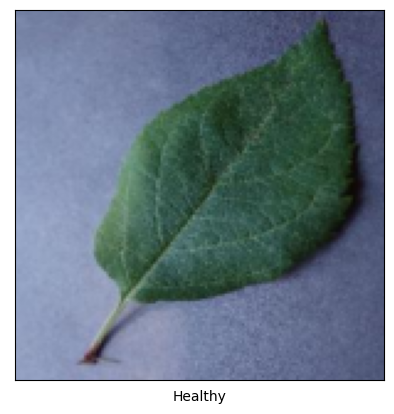

In [46]:
def display_img(img,label):
    plt.imshow(img.permute(1,2,0))
    plt.xlabel(classes[label])
    plt.xticks([])
    plt.yticks([])
    
#display the first image in the dataset
display_img(*train_data[0])

In [50]:
batch_size = 25
train_val_ratio = 0.8
val_size = int(np.round(len(train_data) * (1-train_val_ratio)))
train_size = len(train_data) - val_size 

train_data,val_data = random_split(train_data,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 1136
Length of Validation Data : 284


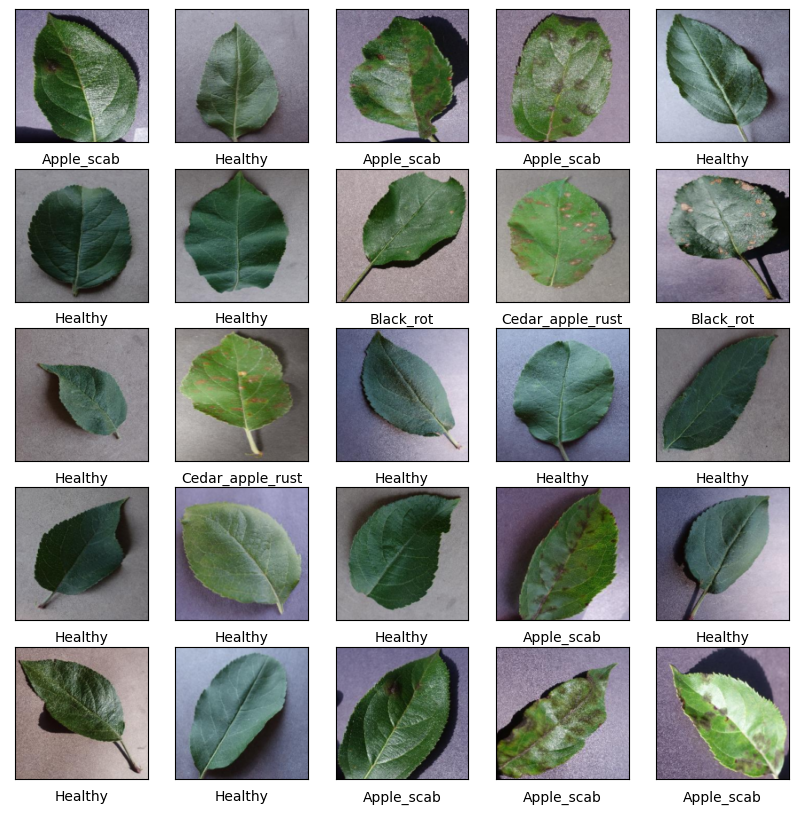

In [53]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=10).permute(1,2,0))
        break

def show_batch_with_labels(dl):
    plt.figure(figsize=(10,10))
    images, labels = next(iter(dl))
    for i in range(25):
        plt.subplot(5,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        display_img(images[i],labels[i].item())
    plt.show()
        
show_batch_with_labels(train_dl)

In [60]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")()

tensor([1.], device='mps:0')
